## Import Libraries


In [1]:
import numpy as np 
import pandas as pd 
import os

import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

from sklearn.preprocessing import MinMaxScaler

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

## Loading Stock Data

The dataset is taken from https://in.finance.yahoo.com/ . Any stock dataset you want to add in the website can be taken from the website given above then traing the model on that dataset

In [2]:
data = './data/AMZN.csv'

In [3]:
df = pd.read_csv(data)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600
1,2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400
2,2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400
3,2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000
4,2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400


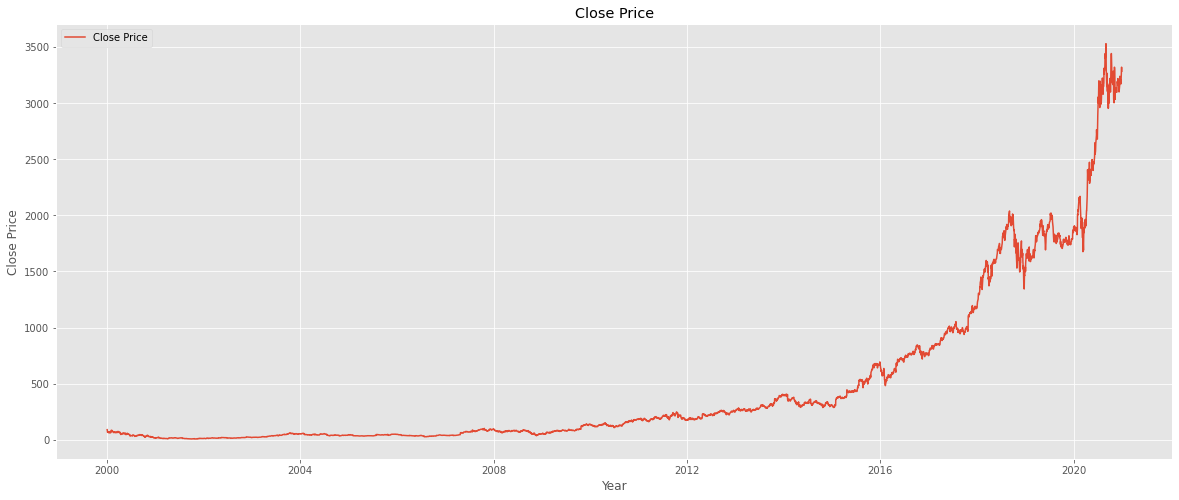

In [9]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label='Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price') 
plt.title('Close Price')
plt.legend() 

In [10]:
features = ["Date", "Close"]
all_data = df[features]
all_data.index = all_data.Date
all_data.drop('Date', axis=1, inplace=True)

/home/codevardhan/.env-list/mach-env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
all_data.head()
all_data.shape

(5283, 1)

## Pre-processing Stock Data

In [12]:
dataset = all_data.values
train = dataset[2000:4500,:]
valid = dataset[4500:,:]

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [14]:
x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
#we take the 90 days dataset and predict the 91st day
#Code for making csv for it will be reflected during the presentation part where
#We created a front end and backend to use the model we made here

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [20]:
inputs = all_data[len(all_data) - len(valid)-90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
inputs.shape
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)

## Making the model


Initializing the LSTM model and 2nd, 3rd and 4th LSTM layer each with a Dropout Layer. The layers contain 50 neurons and with a Dropout rate of 20%, twenty percent of 50 neurons will be ignored randomly during each iteration

Finally, an output layer is added with 1 as an output dimension (as we are predicting the close price)


We use Stochastic Gradient Descent algorithm to compile the model and use mean squared error ad loss function

In [21]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate = 0.3))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.3))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.3))

model.add(LSTM(units=50, return_sequences = False))
model.add(Dropout(rate = 0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#we use standard adam's optimizer

## Training the model

In [22]:
model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
19/19 [==============================] - 5s 21ms/step - loss: 7.2407e-05
Epoch 2/100
19/19 [==============================] - 0s 15ms/step - loss: 2.2689e-05
Epoch 3/100
19/19 [==============================] - 0s 16ms/step - loss: 7.2386e-06
Epoch 4/100
19/19 [==============================] - 0s 15ms/step - loss: 5.3153e-06
Epoch 5/100
19/19 [==============================] - 0s 15ms/step - loss: 4.9600e-06
Epoch 6/100
19/19 [==============================] - 0s 15ms/step - loss: 4.3642e-06
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 4.5649e-06
Epoch 8/100
19/19 [==============================] - 0s 15ms/step - loss: 4.8130e-06
Epoch 9/100
19/19 [==============================] - 0s 15ms/step - loss: 4.2431e-06
Epoch 10/100
19/19 [==============================] - 0s 15ms/step - loss: 4.0493e-06
Epoch 11/100
19/19 [==============================] - 0s 15ms/step - loss: 3.8127e-06
Epoch 12/100
19/19 [==============================] - 0s 15ms/s

In [23]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

In [24]:
print(preds.shape)

(783, 1)


In [25]:
print(valid.shape)

(783, 1)


In [26]:
print(valid[-1],preds[-1])

[3285.850098] [2961.966]


## Results

In [27]:
rms=np.sqrt(np.mean(np.power((valid-preds),2)))
rms
# it is the standard deviation of the residuals (prediction errors)

144.16328433310358

/tmp/ipykernel_113918/3637043877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


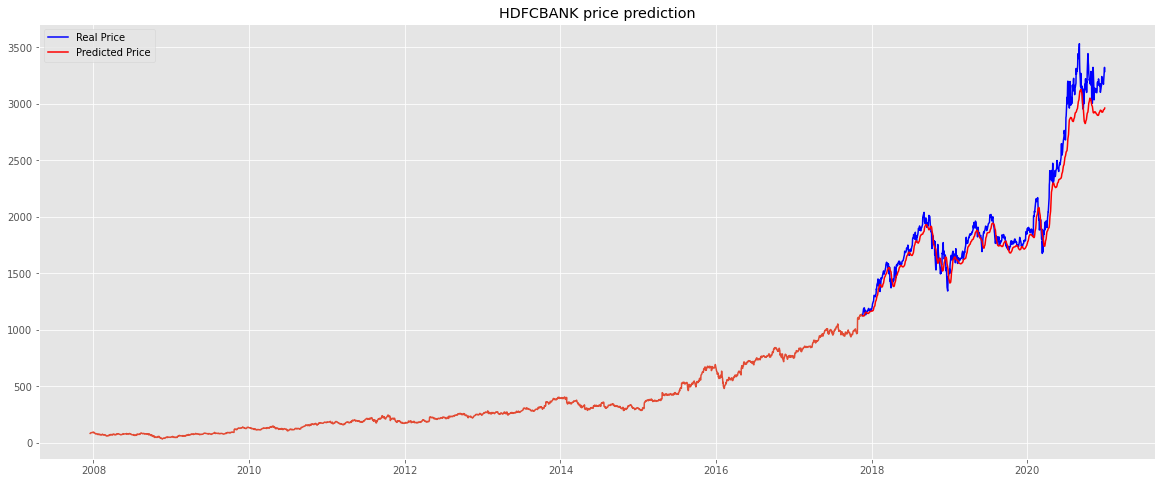

In [28]:
train = all_data[2000:4500]
valid = all_data[4500:]
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(train['Close'])
plt.plot(valid['Close'], color = 'blue', label = 'Real Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Price')
plt.title('HDFCBANK price prediction')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('AMZN.h5')  # creates a HDF5 file 